# How to Calculate Feature Importance With Python

Author: Jason Brownlee

Article from [machinelearningmastery](https://machinelearningmastery.com/calculate-feature-importance-with-python/).

> Note: In this notebook, I am studying the article mentioned above. Some changes may have been made to the code during its implementation.

# Library

In [1]:
# Check scikit-learn version
import sklearn
print(sklearn.__version__)

1.1.1


In [46]:
# Check xgboost version
import xgboost
print(xgboost.__version__)

1.6.2


In [78]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from matplotlib import pyplot

# Test datasets

## Classification dataset

### Define dataset

In [3]:
X_classification, y_classification = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

### Summarize the dataset

In [4]:
print(X_classification.shape, y_classification.shape)

(1000, 10) (1000,)


## Regression dataset

### Define dataset

In [5]:
X_regression, y_regression = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

### Summarize the dataset

In [6]:
print(X_regression.shape, y_regression.shape)

(1000, 10) (1000,)


# Coefficients as feature importance

## Linear regression feature importance

### Define the model

In [7]:
model_linear_regression = LinearRegression()

### Fit the model

In [8]:
model_linear_regression.fit(X_regression, y_regression)

LinearRegression()

### Get importance

In [10]:
importance = model_linear_regression.coef_
importance

array([-3.47785308e-15,  1.24448279e+01, -3.55271368e-15, -1.13242749e-14,
        9.33222545e+01,  8.65081100e+01,  2.67460667e+01,  3.28534640e+00,
       -1.77635684e-14,  4.26325641e-14])

### Summarize feature importance

In [11]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


### Plot feature importance

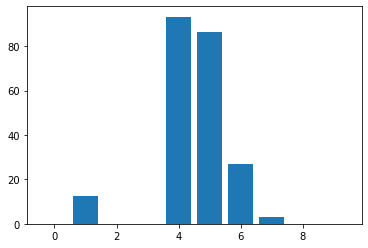

In [12]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Logistic regression feature importance

### Define the model

In [15]:
model_logistic_regression = LogisticRegression()

### Fit the model

In [16]:
model_logistic_regression.fit(X_classification, y_classification)

LogisticRegression()

### Get importance

In [18]:
importance = model_logistic_regression.coef_[0]
importance

array([ 0.16319742, -0.64301454,  0.4849665 , -0.46189527,  0.18431777,
       -0.11978098, -0.4060204 ,  0.03771881, -0.51785423,  0.26539871])

### Summarize feature importance

In [19]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


### Plot feature importance

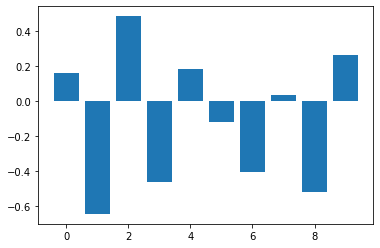

In [20]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Decision tree feature importance

## CART feature importance

### CART regression feature importance

#### Define the model

In [22]:
model_tree_regressor = DecisionTreeRegressor()

#### Fit the model

In [23]:
model_tree_regressor.fit(X_regression, y_regression)

DecisionTreeRegressor()

#### Get importance

In [25]:
importance = model_tree_regressor.feature_importances_
importance

array([0.00253653, 0.00444753, 0.0023497 , 0.0019931 , 0.51618215,
       0.43804901, 0.0277155 , 0.00304072, 0.00257043, 0.00111532])

#### Summarize feature importance

In [26]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00254
Feature: 1, Score: 0.00445
Feature: 2, Score: 0.00235
Feature: 3, Score: 0.00199
Feature: 4, Score: 0.51618
Feature: 5, Score: 0.43805
Feature: 6, Score: 0.02772
Feature: 7, Score: 0.00304
Feature: 8, Score: 0.00257
Feature: 9, Score: 0.00112


#### Plot feature importance

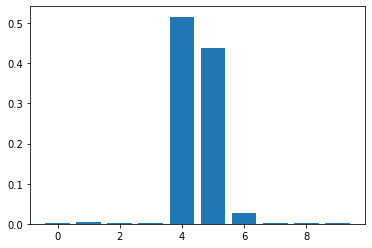

In [27]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### CART classification feature importance

#### Define the model

In [29]:
model_tree_classifier = DecisionTreeClassifier()

#### Fit the model

In [30]:
model_tree_classifier.fit(X_classification, y_classification)

DecisionTreeClassifier()

#### Get importance

In [31]:
importance = model_tree_classifier.feature_importances_
importance

array([0.0116185 , 0.01497289, 0.17930548, 0.31452184, 0.08323582,
       0.01018569, 0.15953398, 0.05909244, 0.13161641, 0.03591694])

#### Summarize feature importance

In [32]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01162
Feature: 1, Score: 0.01497
Feature: 2, Score: 0.17931
Feature: 3, Score: 0.31452
Feature: 4, Score: 0.08324
Feature: 5, Score: 0.01019
Feature: 6, Score: 0.15953
Feature: 7, Score: 0.05909
Feature: 8, Score: 0.13162
Feature: 9, Score: 0.03592


#### Plot feature importance

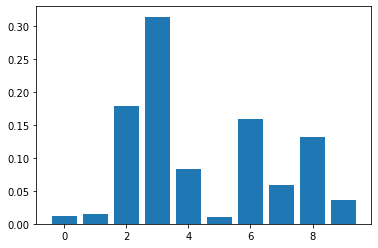

In [33]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Random forest feature importance

## Random forest regression feature importance

### Define the model

In [35]:
model_forest_regressor = RandomForestRegressor()

### Fit the model

In [36]:
model_forest_regressor.fit(X_regression, y_regression)

RandomForestRegressor()

### Get importance

In [37]:
importance = model_forest_regressor.feature_importances_
importance

array([0.00279143, 0.00548949, 0.00279617, 0.00294358, 0.52663487,
       0.42502353, 0.02563411, 0.00288777, 0.00311455, 0.00268451])

### Summarize feature importance

In [38]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00279
Feature: 1, Score: 0.00549
Feature: 2, Score: 0.00280
Feature: 3, Score: 0.00294
Feature: 4, Score: 0.52663
Feature: 5, Score: 0.42502
Feature: 6, Score: 0.02563
Feature: 7, Score: 0.00289
Feature: 8, Score: 0.00311
Feature: 9, Score: 0.00268


### Plot feature importance

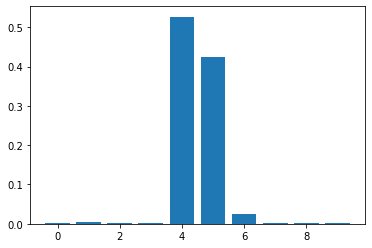

In [39]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random forest classification feature importance

### Define the model

In [41]:
model_forest_classifier = RandomForestClassifier()

### Fit the model

In [42]:
model_forest_classifier.fit(X_classification, y_classification)

RandomForestClassifier()

### Get importance

In [43]:
importance = model_forest_classifier.feature_importances_
importance

array([0.0705561 , 0.0883123 , 0.16495899, 0.20749389, 0.09143889,
       0.09828583, 0.09393043, 0.05251614, 0.08740707, 0.04510036])

### Summarize feature importance

In [44]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07056
Feature: 1, Score: 0.08831
Feature: 2, Score: 0.16496
Feature: 3, Score: 0.20749
Feature: 4, Score: 0.09144
Feature: 5, Score: 0.09829
Feature: 6, Score: 0.09393
Feature: 7, Score: 0.05252
Feature: 8, Score: 0.08741
Feature: 9, Score: 0.04510


### Plot feature importance

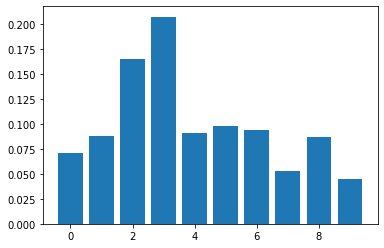

In [45]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# XGBoost feature importance

## XGBoost regression feature importance

### Define the model

In [48]:
model_xgbregressor = XGBRegressor()

### Fit the model

In [49]:
model_xgbregressor.fit(X_regression, y_regression)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Get importance

In [50]:
importance = model_xgbregressor.feature_importances_
importance

array([3.8783351e-04, 5.8324076e-03, 1.1211819e-03, 1.2948976e-03,
       4.9502391e-01, 4.6443373e-01, 2.9509565e-02, 8.5885770e-04,
       7.4822904e-04, 7.8935362e-04], dtype=float32)

### Summarize feature importance

In [51]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00039
Feature: 1, Score: 0.00583
Feature: 2, Score: 0.00112
Feature: 3, Score: 0.00129
Feature: 4, Score: 0.49502
Feature: 5, Score: 0.46443
Feature: 6, Score: 0.02951
Feature: 7, Score: 0.00086
Feature: 8, Score: 0.00075
Feature: 9, Score: 0.00079


### Plot feature importance

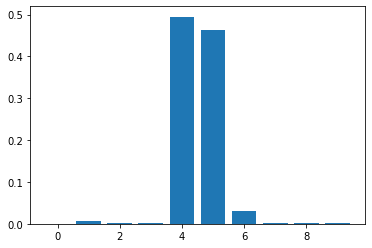

In [52]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## XGBoost classification feature importance

### Define the model

In [54]:
model_xgbclassifier = XGBClassifier()

### Fit the model

In [55]:
model_xgbclassifier.fit(X_classification, y_classification)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Get importance

In [56]:
importance = model_xgbclassifier.feature_importances_
importance

array([0.0372345 , 0.07725286, 0.12537324, 0.29665607, 0.10098713,
       0.05705741, 0.13027075, 0.0353724 , 0.11694237, 0.02285325],
      dtype=float32)

### Summarize feature importance

In [57]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03723
Feature: 1, Score: 0.07725
Feature: 2, Score: 0.12537
Feature: 3, Score: 0.29666
Feature: 4, Score: 0.10099
Feature: 5, Score: 0.05706
Feature: 6, Score: 0.13027
Feature: 7, Score: 0.03537
Feature: 8, Score: 0.11694
Feature: 9, Score: 0.02285


### Plot feature importance

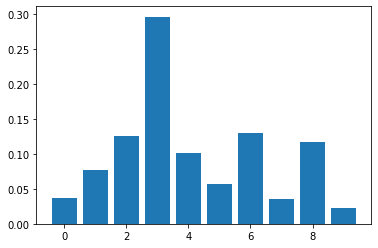

In [58]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Permutation feature importance

## Permutation feature importance for regression

### Define the model

In [60]:
model_knn_regressor = KNeighborsRegressor()

### Fit the model

In [61]:
model_knn_regressor.fit(X_regression, y_regression)

KNeighborsRegressor()

### Perform permutation importance

In [62]:
results = permutation_importance(model_knn_regressor, X_regression, y_regression, scoring='neg_mean_squared_error')
results

{'importances_mean': array([ 178.13196878,  376.86823285,  150.36798365,   27.53021194,
        9531.78326612, 8100.43328671,  822.7193168 ,   83.39864586,
         118.6833623 ,  116.57337535]),
 'importances_std': array([ 33.882693  ,  30.62239491,  45.8092572 ,  77.28412073,
        144.31468567, 292.90702899,  47.36489218,  62.00447976,
         28.25096217,  93.57478898]),
 'importances': array([[ 1.68664340e+02,  2.36496058e+02,  1.36934461e+02,
          1.90365247e+02,  1.58199739e+02],
        [ 3.19785717e+02,  4.00745858e+02,  4.01179040e+02,
          3.70602361e+02,  3.92028187e+02],
        [ 1.91742012e+02,  2.17439676e+02,  1.24916297e+02,
          1.18623524e+02,  9.91184085e+01],
        [-2.04081084e+01,  6.16335520e+01,  8.41921948e+00,
          1.56908264e+02, -6.89018672e+01],
        [ 9.51311990e+03,  9.46327283e+03,  9.38104580e+03,
          9.49570830e+03,  9.80576950e+03],
        [ 8.48111421e+03,  8.36030200e+03,  8.01587807e+03,
          7.98797830e+03

### Get importance

In [63]:
importance = results.importances_mean
importance

array([ 178.13196878,  376.86823285,  150.36798365,   27.53021194,
       9531.78326612, 8100.43328671,  822.7193168 ,   83.39864586,
        118.6833623 ,  116.57337535])

### Summarize feature importance

In [64]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 178.13197
Feature: 1, Score: 376.86823
Feature: 2, Score: 150.36798
Feature: 3, Score: 27.53021
Feature: 4, Score: 9531.78327
Feature: 5, Score: 8100.43329
Feature: 6, Score: 822.71932
Feature: 7, Score: 83.39865
Feature: 8, Score: 118.68336
Feature: 9, Score: 116.57338


### Plot feature importance

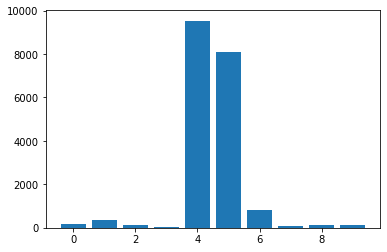

In [65]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Permutation feature importance for classification

### Define the model

In [67]:
model_knn_classifier = KNeighborsClassifier()

### Fit the model

In [68]:
model_knn_classifier.fit(X_classification, y_classification)

KNeighborsClassifier()

### Perform permutation importance

In [69]:
results = permutation_importance(model_knn_classifier, X_classification, y_classification, scoring='accuracy')
results

{'importances_mean': array([0.0452, 0.063 , 0.0498, 0.0848, 0.0506, 0.0574, 0.0768, 0.0562,
        0.0546, 0.0248]),
 'importances_std': array([0.00444522, 0.01084435, 0.00470744, 0.00487442, 0.00523832,
        0.01066958, 0.00746726, 0.00908625, 0.00557136, 0.00810925]),
 'importances': array([[0.052, 0.042, 0.042, 0.049, 0.041],
        [0.058, 0.07 , 0.063, 0.078, 0.046],
        [0.043, 0.052, 0.05 , 0.057, 0.047],
        [0.077, 0.088, 0.086, 0.091, 0.082],
        [0.043, 0.051, 0.052, 0.048, 0.059],
        [0.051, 0.041, 0.072, 0.064, 0.059],
        [0.075, 0.076, 0.08 , 0.088, 0.065],
        [0.056, 0.059, 0.068, 0.058, 0.04 ],
        [0.064, 0.055, 0.056, 0.048, 0.05 ],
        [0.02 , 0.021, 0.021, 0.021, 0.041]])}

### Get importance

In [70]:
importance = results.importances_mean
importance

array([0.0452, 0.063 , 0.0498, 0.0848, 0.0506, 0.0574, 0.0768, 0.0562,
       0.0546, 0.0248])

### Summarize feature importance

In [71]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04520
Feature: 1, Score: 0.06300
Feature: 2, Score: 0.04980
Feature: 3, Score: 0.08480
Feature: 4, Score: 0.05060
Feature: 5, Score: 0.05740
Feature: 6, Score: 0.07680
Feature: 7, Score: 0.05620
Feature: 8, Score: 0.05460
Feature: 9, Score: 0.02480


### Plot feature importance

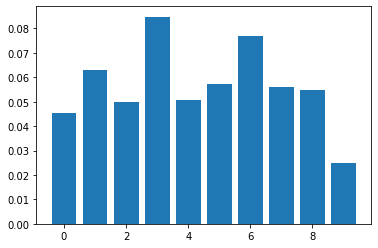

In [72]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Feature selection with importance

## Split into train and test sets

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.33, random_state=1)

## Fit the model

In [75]:
model_logistic_regression = LogisticRegression(solver='liblinear')
model_logistic_regression.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

## Evaluate the model

In [76]:
yhat = model_logistic_regression.predict(X_test)

## Evaluate predictions

In [77]:
accuracy = accuracy_score(y_true=y_test, y_pred=yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


## Evaluation of a model using 5 features chosen with random forest importance

### Feature selection function

In [84]:
def select_features(X_train, y_train, X_test):
    # Configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
    # Learn relationship from training data
    fs.fit(X_train, y_train)
    # Transform train input data
    X_train_fs = fs.transform(X_train)
    # Transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

### Feature selection

In [85]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

### Fit the model

In [86]:
model_logistic_regression = LogisticRegression(solver='liblinear')
model_logistic_regression.fit(X_train_fs, y_train)

LogisticRegression(solver='liblinear')

### Evaluate the model

In [87]:
yhat = model_logistic_regression.predict(X_test_fs)

### Evaluate predictions

In [88]:
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55
